### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Pixel-Based Image Enhancement Algorithms**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

Histogram-based image enhancement is widely used in digital image processing to improve the visibility of features and boost contrast in images. It is one of the fastest-growing areas in computer science, serving as a critical tool in fields such as medical imaging, remote sensing, and computer vision. Among its many techniques, methods like the median filter, contrast stretching, histogram equalization, negative image transformation, and power-law (gamma) transformation stand out as particularly effective for enhancing image quality and highlighting important details.

#### What Is an Image Histogram?

An image histogram provides a graphical representation of an image’s pixel intensity values. Practically, it can be viewed as a data structure that counts how many pixels occur at each intensity level. This information is invaluable for a variety of image processing operations, particularly those aiming to modify brightness, contrast, or detect specific intensity-related features.

<img src="./data/activity 1/Image_Histogram.png" alt="Histogram Example" width="400"/>
It is a graphical representation of the intensity distribution of an image.
It quantifies the number of pixels for each intensity value.
By analyzing the shape and spread of the histogram, one can select the most appropriate enhancement technique. For example, histogram equalization redistributes intensities for a more uniform distribution, whereas power-law (gamma) transformations brighten or darken specific ranges of the image.

#### What Is Histogram Equalization?

As mentioned above, histogram equalization is an image processing technique that adjusts an image’s contrast by spreading out the pixel intensity range. By stretching the intensity distribution, areas with low contrast gain higher contrast, thereby revealing more detail.

<img src="./data/activity 1/histogram_represent.png" alt="Histogram Equalization Example" width="400"/>

### Importing libraries

In [34]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [35]:
# Loading images
dog_img = Image.open('data/activity 1/perrito.jpeg')
dental_img = Image.open('data/activity 1/dental-x-ray.jpg')
microscope_img = Image.open('data/activity 1/microscope.jpg')
paysage_img = Image.open('data/activity 1/paysage.png')
retina_img = Image.open('data/activity 1/retina.png')
map_img = Image.open('data/activity 1/map2.jpg')
example_circuit_img = Image.open('data/activity 1/example_circuit.jpg')
#defected_circuit_img = Image.open('data/activity 1/defected_circuit.jpg')

In [36]:
#Plot the original image and its histogram with the equalized image and its histogram
def plot_images(original_img, equalized_img):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].imshow(original_img, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')
    axs[0, 1].hist(np.array(original_img).flatten(), bins=256, range=(0, 256), density=True, color='r')
    axs[0, 1].set_title('Original Histogram')
    axs[1, 0].imshow(equalized_img, cmap='gray')
    axs[1, 0].set_title('Equalized Image')
    axs[1, 0].axis('off')
    axs[1, 1].hist(np.array(equalized_img).flatten(), bins=256, range=(0, 256), density=True, color='r')
    axs[1, 1].set_title('Equalized Histogram')
    plt.show()
    

### 1. Tile-based histogram equalization



The tile-based histogram equalization (TBHE) is also know as Adaptive Histogram Equalization (AHE) is a method that divides the image into tiles, for that reason, it is called tile-based. The optimal number of tiles is determined by the size of the image, and its determination requires some experimentation.

This method is used to improve the contrast of the image, and it is particularly useful when the image has regions with different illumination levels. This method is optimized to work with grayscale images, but it can be adapted to work with color images.

Some of the benefits of the AHE method are:

* It is a simple method to implement.
* It is a fast method.
* It is a non-linear method, which means that it can improve the contrast of the image.

Although the AHE method is very useful, it has some drawbacks. One of the main drawbacks is that it can amplify the noise in the image. This is because the method is based on the histogram of the image, and the noise can be considered as a part of the histogram.



==== (8, 8) ====


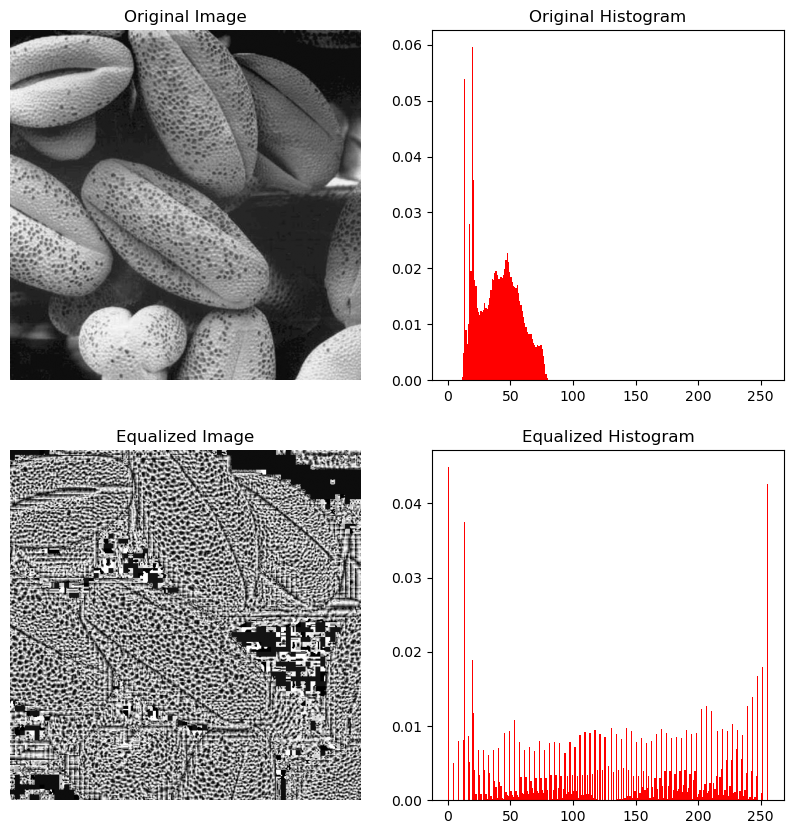

==== (16, 16) ====


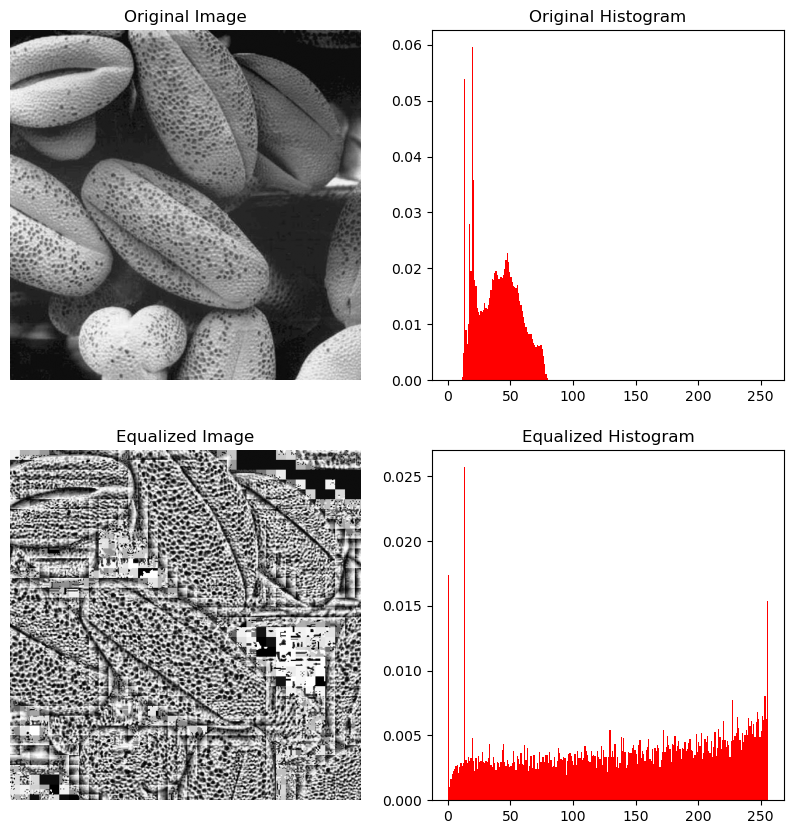

==== (32, 32) ====


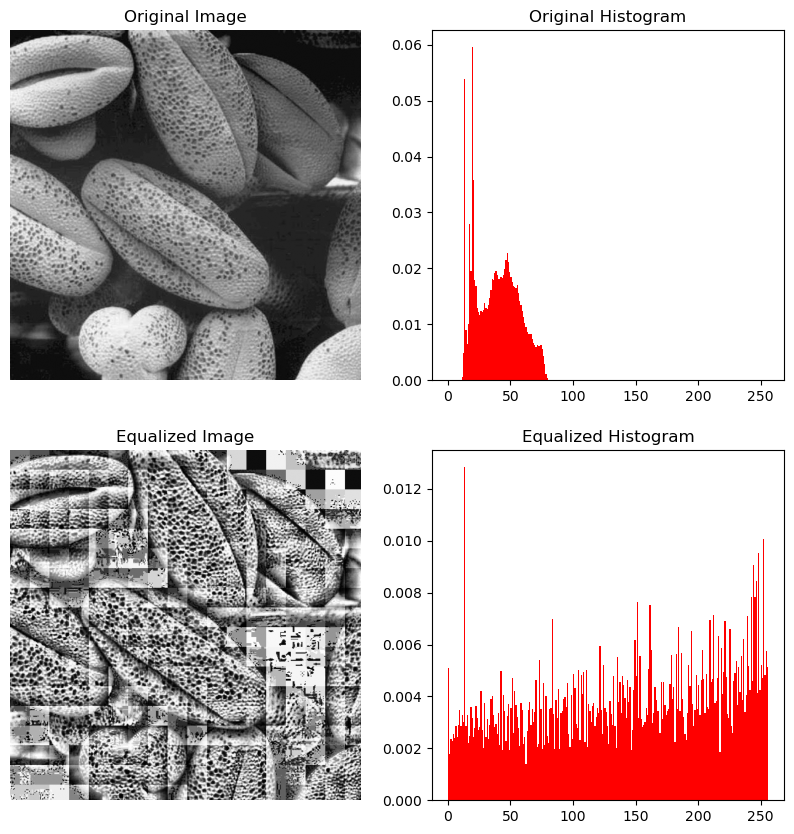

==== (64, 64) ====


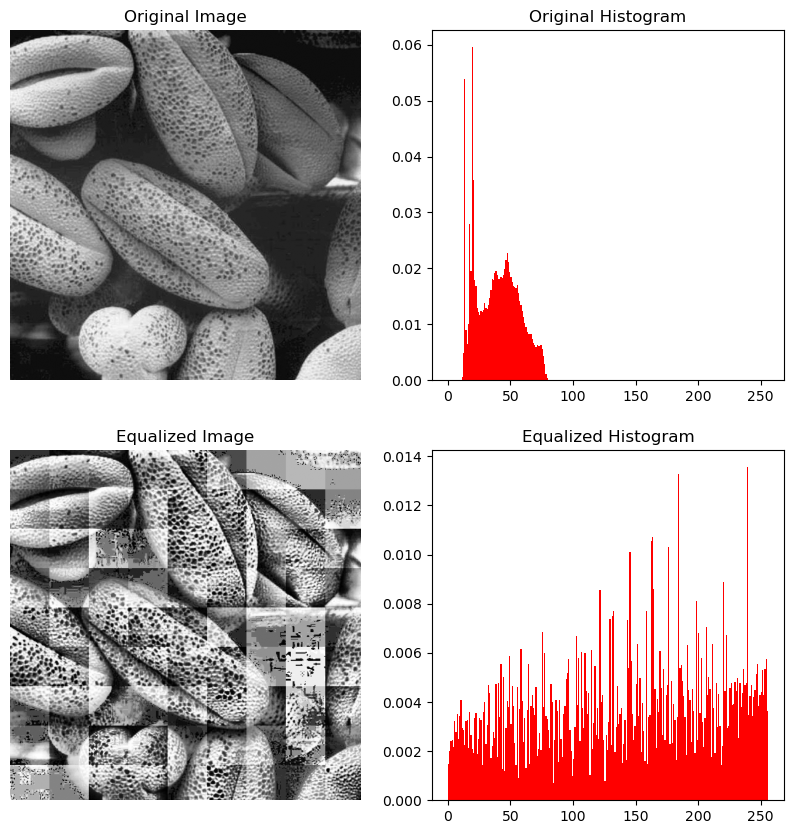

In [37]:
#Tile-based histogram equalization
def tile_based_histogram_equalization(image, tile_size=(8, 8)):
    h, w = image.shape
    tile_h, tile_w = tile_size
    pad_h = (tile_h - h % tile_h) % tile_h
    pad_w = (tile_w - w % tile_w) % tile_w
    padded_image = cv2.copyMakeBorder(image, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)
    h_padded, w_padded = padded_image.shape
    output_image = np.zeros_like(padded_image)
    
    # Recorrer la imagen con saltos de tile_h x tile_w
    for i in range(0, h_padded, tile_h):
        for j in range(0, w_padded, tile_w):
            tile = padded_image[i:i+tile_h, j:j+tile_w]
            equalized_tile = cv2.equalizeHist(tile)
            output_image[i:i+tile_h, j:j+tile_w] = equalized_tile
    
    output_image = output_image[:h, :w]
    return output_image

# Convert to grey the image
microscope_img_gray = np.array(microscope_img.convert('L'))

# differente tile sizes
tile_sizes = [(8, 8), (16, 16), (32, 32), (64, 64)]
for ts in tile_sizes:
    microscope_img_eq = tile_based_histogram_equalization(microscope_img_gray, ts)
    
    print(f"==== {ts} ====")
    plot_images(microscope_img_gray, microscope_img_eq)



As saw in the previous image we can see that the image this algorith produced a rough image with visible artifacts at the boundaries of the tiles. This is because the algorithm processes each tile separately and the histogram equalization algorithm is applied to each tile independently.

A practical way to reduce visible seams between tiles is to blend or interpolate adjacent blocks. Alternatively, use a sliding window or CLAHE (Contrast Limited Adaptive Histogram Equalization), which applies both contrast limiting and interpolation between blocks.

### 2. Sliding Window Adaptative Histogram Equalization (SWAHE)

Sliding Window Adaptive Histogram Equalization (SWAHE) is a method that divides the image into tiles and applies the adaptive histogram equalization algorithm to each tile. The algorithm consists of the following steps:

1. Divide the image into tiles.
2. Apply the adaptive histogram equalization algorithm to each tile.
3. Combine the tiles to obtain the final image.



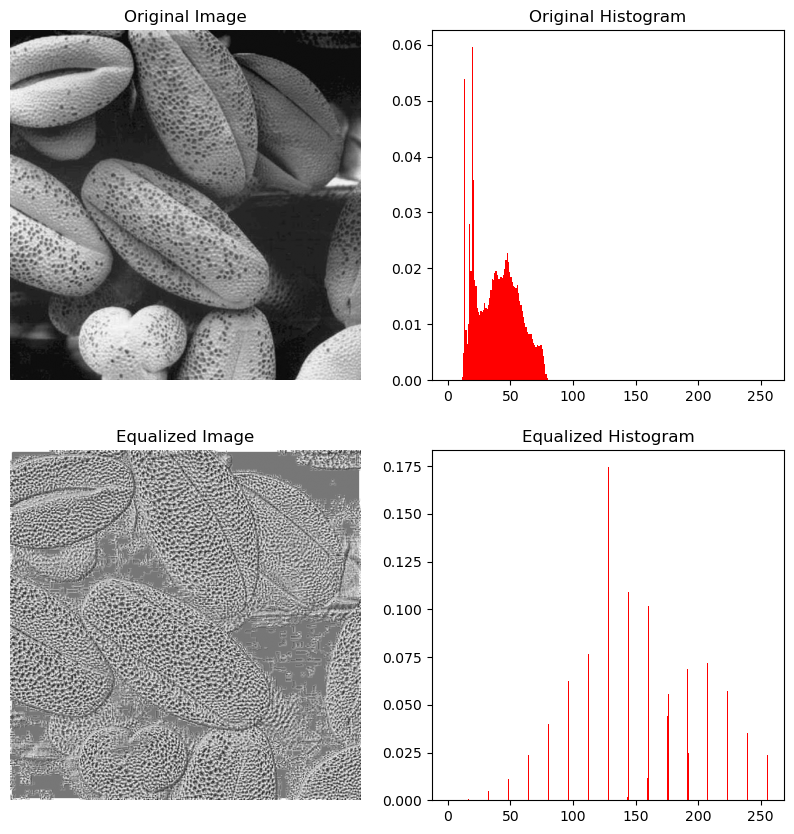

In [38]:
# Sliding window based Adaptive Histogram Equalization
def sliding_window_adaptive_histogram_equalization(img, window_size):
    img = np.array(img.convert('L'))  # Convert to grayscale
    img_eq = np.zeros_like(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(window_size, window_size))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            i_start = max(0, i - window_size // 2)
            i_end = min(img.shape[0], i + window_size // 2 + 1)
            j_start = max(0, j - window_size // 2)
            j_end = min(img.shape[1], j + window_size // 2 + 1)
            window = img[i_start:i_end, j_start:j_end]
            window_eq = clahe.apply(window)
            img_eq[i, j] = window_eq[i - i_start, j - j_start]
    return img_eq

# Applying sliding window based adaptive histogram equalization
window_size = 8 
microscope_img_eq = sliding_window_adaptive_histogram_equalization(microscope_img, window_size)

# Plotting images
plot_images(np.array(microscope_img.convert('L')), microscope_img_eq)


As we can see in the previous image, the SWAHE algorithm produced a better result than the tile-based histogram equalization algorithm. The SWAHE algorithm produced a smoother image with less visible artifacts at the boundaries of the tiles. 

### 3. Contrast Limited Adaptative histogram Equalization 


Contrast-limited adaptive histogram equalization (CLAHE) is a method that divides the image into tiles  and applies the adaptive histogram equalization algorithm to each tile.

The algorithm consists of the following steps:
* Divide the image into tiles.
* Apply the adaptive histogram equalization algorithm to each tile.
* Combine the tiles to obtain the final image.
    
The main difference between CLAHE and SWAHE is that CLAHE limits the contrast of the image by clipping the histogram of each tile. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:

This provides a more natural look to the image, as it prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:


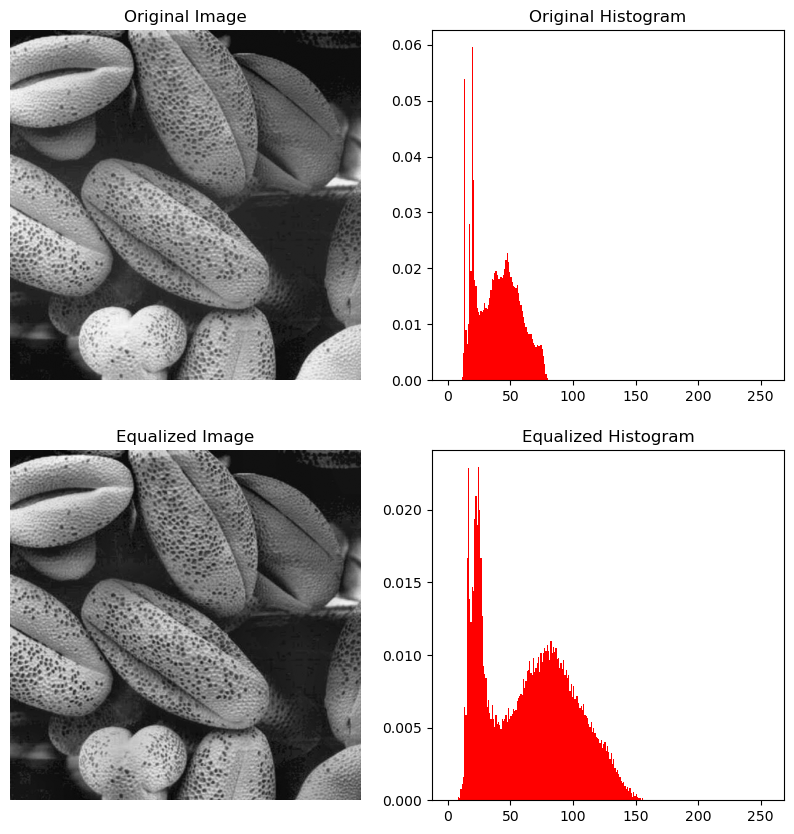

In [39]:
#Contrast-limited adaptive histogram equalization (CLAHE)
def clahe(img, clip_limit, grid_size):
    img = np.array(img.convert('L'))  # Convert to grayscale
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(grid_size, grid_size))
    img_eq = clahe.apply(img)
    return img_eq

#Applying CLAHE
clip_limit = 2.0

#Applying CLAHE
microscope_img_eq = clahe(microscope_img, clip_limit, 8)

#Plotting images
plot_images(np.array(microscope_img.convert('L')), microscope_img_eq)

As we can see, the **CLAHE** algorithm is similar to the **SWAHE** algorithm, but it includes an additional step to limit the contrast of the image. This is done by clipping the histogram of each tile to a specified contrast limit. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts.

### Conclusion

Histogram equalization is especially helpful for images that appear washed out due to insufficient contrast. In such cases, the bright and dark areas merge into a flat image that lacks highlights and shadows.

In this notebook, we implemented three pixel-based image enhancement algorithms: tile-based histogram equalization, sliding window adaptive histogram equalization (SWAHE), and contrast-limited adaptive histogram equalization (CLAHE). We then applied these algorithms to a sample image and compared the results:

* Tile-Based Histogram Equalization (tile size = 64): Shows how local contrast can be enhanced, revealing fine textural details. However, the block-wise approach may introduce visible boundaries where tiles meet.
* Global Histogram Equalization: Produces a more uniform brightness distribution but can be less sensitive to subtle local variations.
* Adaptive Methods (SWAHE, CLAHE): Strive to combine the strengths of both global and local approaches while minimizing artifacts like excessive noise or block effects.

Overall, each method excels under different conditions. Tile-based methods suit images with uneven lighting or complex textures, whereas global methods maintain a more consistent contrast across the entire scene. More advanced methods like CLAHE can strike a balance between local detail enhancement and artifact suppression.

By understanding the advantages and limitations of each algorithm, practitioners can select or combine the techniques that best meet their requirements for detail enhancement, noise control, and overall image quality.

### References

* OpenCV. (2021). Histogram Equalization Tutorial
* Kyawsawhtoon. (2018). A Tutorial to Histogram Equalization
* Karmatnspyphuntsho-Tijtech. (2019). Introduction to Image Processing using OpenCV in Google Colab
* Gonzalez, R. & Woods, R. (2018). Digital Image Processing (4th ed.). Pearson.
* Härtinger, P., & Steger, C. (2024). Adaptive histogram equalization in constant time. Journal Of Real-Time Image Processing, 21(3). https://doi.org/10.1007/s11554-024-01465-1\n"
